In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)

In [3]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [9]:
menores_14 = dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)
menores_14

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
SP    0.075862
MG    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
MT    0.027586
AM    0.027586
DF    0.027586
PR    0.020690
TO    0.020690
SE    0.020690
RO    0.013793
SC    0.013793
AL    0.013793
AP    0.006897
RN    0.006897
ES    0.006897
AC    0.006897
RS    0.006897
RJ    0.006897
MS    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

<AxesSubplot:>

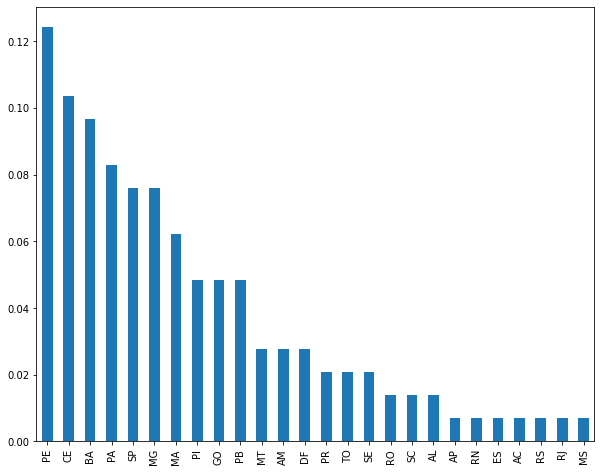

In [16]:
menores_14.plot.bar(figsize=(10,8))

In [29]:
renda_ord = dados["Q006"].unique()
renda_ord.sort()

def calcula_nota_por_renda(nota):
    plt.figure(figsize=(10,8))
    sns.boxplot(x="Q006", y=nota, data=dados, order=renda_ord)
    plt.title("Renda x " + nota)    

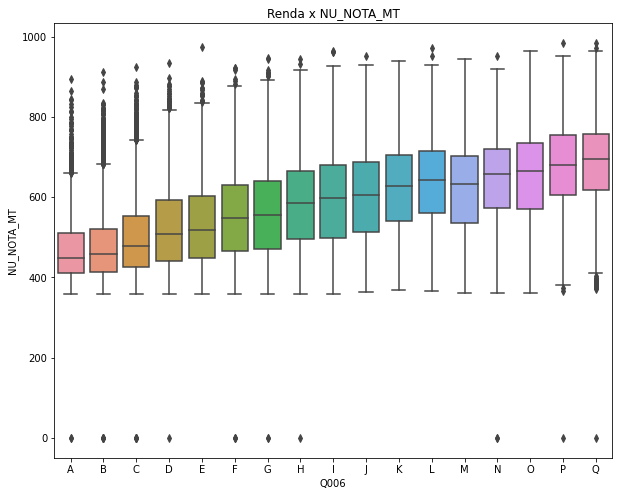

In [30]:
calcula_nota_por_renda("NU_NOTA_MT")

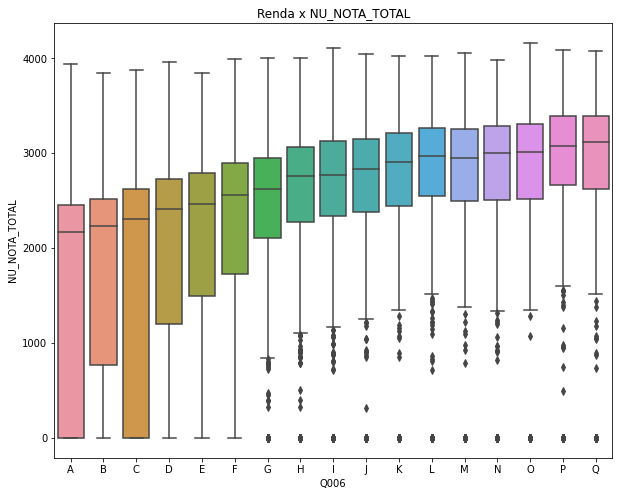

In [33]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
calcula_nota_por_renda("NU_NOTA_TOTAL")

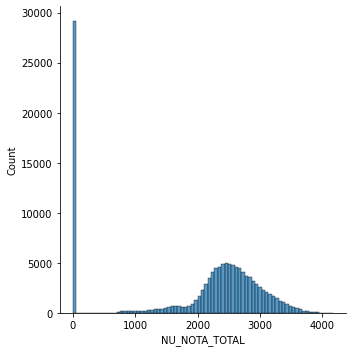

In [32]:
sns.displot(dados, x="NU_NOTA_TOTAL")

In [36]:
nao_zerou = dados.query("NU_NOTA_TOTAL != 0")
nao_zerou.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


In [38]:
def calcula_nota_por_renda_validos(nota):
    plt.figure(figsize=(10,8))
    sns.boxplot(x="Q006", y=nota, data=nao_zerou, order=renda_ord)
    plt.title("Renda x " + nota)

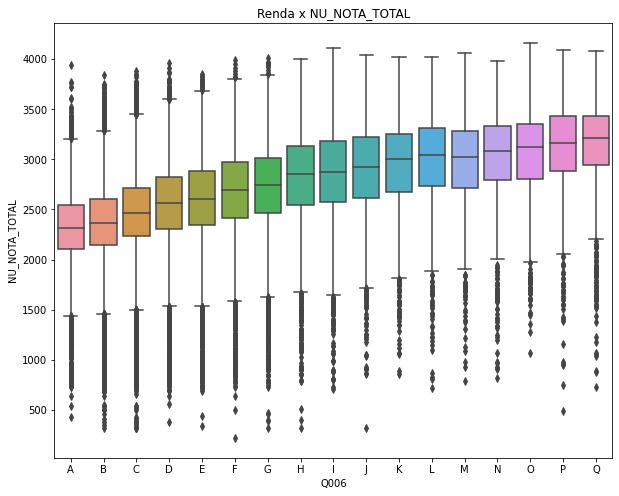

In [39]:
calcula_nota_por_renda_validos("NU_NOTA_TOTAL")

Text(0.5, 1.0, 'Renda x Nota Total x Treineiros')

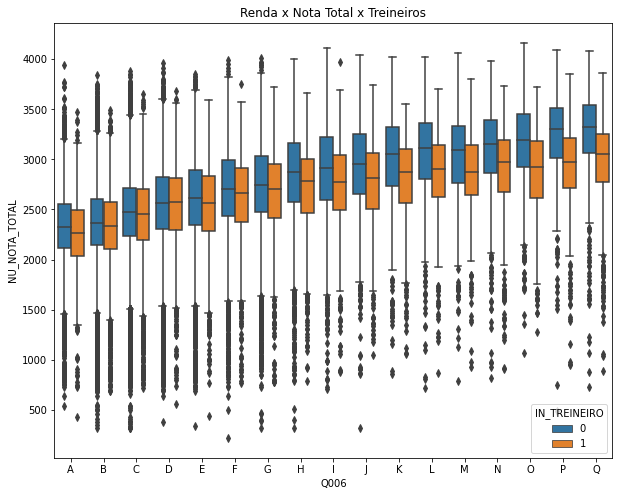

In [44]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=nao_zerou, hue="IN_TREINEIRO", order=renda_ord)
plt.title("Renda x Nota Total x Treineiros")